In [242]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [243]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [244]:
train.info()
print("=================================================")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

In [245]:
X_train = train.drop(["Name", "Transported"], axis=1).copy()
y_train = train["Transported"]
X_test = test.drop(["Name"], axis=1).copy()

In [246]:
print(X_train['CryoSleep'].unique())
print(X_train['CryoSleep'].dtype)

[False True nan]
object


In [247]:
train["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [248]:
X_train["VIP"].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [249]:
X_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [250]:
cryo_rate = train.groupby('CryoSleep')['Transported'].value_counts(normalize=True).unstack()
# → CryoSleep별로 데이터를 나눔 (True, False)
# (normalize=True → 전체 개수가 아니라 비율 반환)
print("✅ CryoSleep과 Transported의 관계 (비율):")
print(cryo_rate)

# VIP별 Transported 비율
vip_rate = train.groupby('VIP')['Transported'].value_counts(normalize=True).unstack()
print("\n✅ VIP와 Transported의 관계 (비율):")
print(vip_rate)


✅ CryoSleep과 Transported의 관계 (비율):
Transported     False     True 
CryoSleep                      
False        0.671079  0.328921
True         0.182417  0.817583

✅ VIP와 Transported의 관계 (비율):
Transported     False     True 
VIP                            
False        0.493668  0.506332
True         0.618090  0.381910


In [251]:
# T / F Data 매핑 
X_train['CryoSleep'] = X_train['CryoSleep'].fillna(False).map({True: 1, False: 0})
X_train['VIP'] = X_train['VIP'].fillna(False).map({True: 1, False: 0})

X_test['CryoSleep'] = X_test['CryoSleep'].fillna(False).map({True: 1, False: 0})
X_test['VIP'] = X_test['VIP'].fillna(False).map({True: 1, False: 0})

C:\Users\human\AppData\Local\Temp\ipykernel_5508\139169602.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['CryoSleep'] = X_train['CryoSleep'].fillna(False).map({True: 1, False: 0})
C:\Users\human\AppData\Local\Temp\ipykernel_5508\139169602.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['VIP'] = X_train['VIP'].fillna(False).map({True: 1, False: 0})
C:\Users\human\AppData\Local\Temp\ipykernel_5508\139169602.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future ver

In [252]:
X_train[['CryoSleep','VIP']].head()

,CryoSleep,VIP
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [253]:
X_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [254]:
X_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep         int64
Cabin            object
Destination      object
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [255]:
print("중앙값 :", X_train['Age'].median())
print("평균값 :", X_train['Age'].mean())

중앙값 : 27.0
평균값 : 28.82793046746535


In [256]:
# 나이 중앙값으로 결측지 처리 
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_train['Age'].median())
print(X_train['Age'].unique())

[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61. 50.
 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71. 75.
 70. 76. 78. 73. 66. 69. 72. 77.]


In [257]:
print(X_train.dtypes)
print("-----------------------------------------------------")
X_train.isnull().sum()

PassengerId      object
HomePlanet       object
CryoSleep         int64
Cabin            object
Destination      object
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object
-----------------------------------------------------


PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [258]:
num_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in num_cols:
    X_train[col] = X_train[col].fillna(0)
    X_test[col] = X_test[col].fillna(0)

In [259]:
X_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [260]:
X_train['HomePlanet'] = X_train['HomePlanet'].fillna('Unknown')
X_train['Destination'] = X_train['Destination'].fillna('Unknown')

X_test['HomePlanet'] = X_test['HomePlanet'].fillna('Unknown')
X_test['Destination'] = X_test['Destination'].fillna('Unknown')


In [261]:
# Cabin → Deck / CabinNum / Side
for df in [X_train, X_test]:
    df[['Deck', 'CabinNum', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df['Deck'] = df['Deck'].fillna('Unknown')
    df['Side'] = df['Side'].fillna('Unknown')
    df['CabinNum'] = df['CabinNum'].fillna(0).astype(float)  # 수치형으로 사용 가능


In [262]:

# Cabin 컬럼은 이제 불필요하면 제거해도 됨
X_train.drop(columns='Cabin', inplace=True)
X_test.drop(columns='Cabin', inplace=True)

In [263]:
X_test['Age'].unique()

array([27., 19., 31., 38., 20., 21., 23., 24., 45., 44., 46., 29., 40.,
       30., 14., 66., 36., 18., 26., 48.,  6., 33.,  1., 17., 34.,  5.,
       22., 16.,  7.,  2.,  0., 56., 39., 35.,  8.,  3.,  9., 25., 42.,
       50., 41., 32., 49., 55., 60., 47., 58., 28., 12., 52., 15., 43.,
       54., 70., 37., 59., 61., 63., 53.,  4., 10., 65., 13., 51., 79.,
       74., 67., 69., 57., 72., 75., 11., 73., 71., 64., 62., 78., 77.,
       68.])

In [264]:
# 연령대 범주형으로 변경 
def age_to_group(age):
    if age < 10:
        return '0-9'
    elif 10 <= age and age < 20:
        return '10-19'
    elif 20 <= age  and age < 30:
        return '20-29'
    elif 30 <= age and age < 40:
        return '30-39'
    elif 40 <= age and age < 50:
        return '40-49'
    elif 50 <= age and age < 60:
        return '50-59'
    elif 60 <= age and age < 70:
        return '60-69'
    else:
        return '70+'

In [265]:
# X_train['AgeGroup'] = X_train['Age'].apply(age_to_group)
# X_test['AgeGroup'] = X_test['Age'].apply(age_to_group)

In [266]:
# 편의시설 지출 총합 
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

print(X_test[spend_cols].sum(axis=1))

X_train['TotalSpent'] = X_train[spend_cols].sum(axis=1)
X_test['TotalSpent'] = X_test[spend_cols].sum(axis=1)

0          0.0
1       2832.0
2          0.0
3       7418.0
4        645.0
         ...  
4272       0.0
4273    1018.0
4274       0.0
4275    3203.0
4276       0.0
Length: 4277, dtype: float64


In [267]:
drop_cols = ['PassengerId']
X_train_final = X_train.drop(columns=drop_cols)
X_test_final = X_test.drop(columns=drop_cols)

In [268]:
X_test_final.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
CabinNum        0
Side            0
TotalSpent      0
dtype: int64

In [269]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수  선택
cat_cols = X_train_final.select_dtypes(include='object').columns

# LabelEncoder 적용
for col in cat_cols:
    le = LabelEncoder()
    total_vals = pd.concat([X_train_final[col], X_test_final[col]])
    le.fit(total_vals)
    
    X_train_final[col] = le.transform(X_train_final[col])
    X_test_final[col] = le.transform(X_test_final[col])


In [270]:
X_train_final.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
CabinNum        0
Side            0
TotalSpent      0
dtype: int64

In [271]:
from lightgbm import LGBMClassifier

# model = LGBMClassifier(
#     random_state=42,
#     n_estimators=500,
#     learning_rate=0.03,
#     max_depth=7,
#     num_leaves=31,
# )

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1888
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

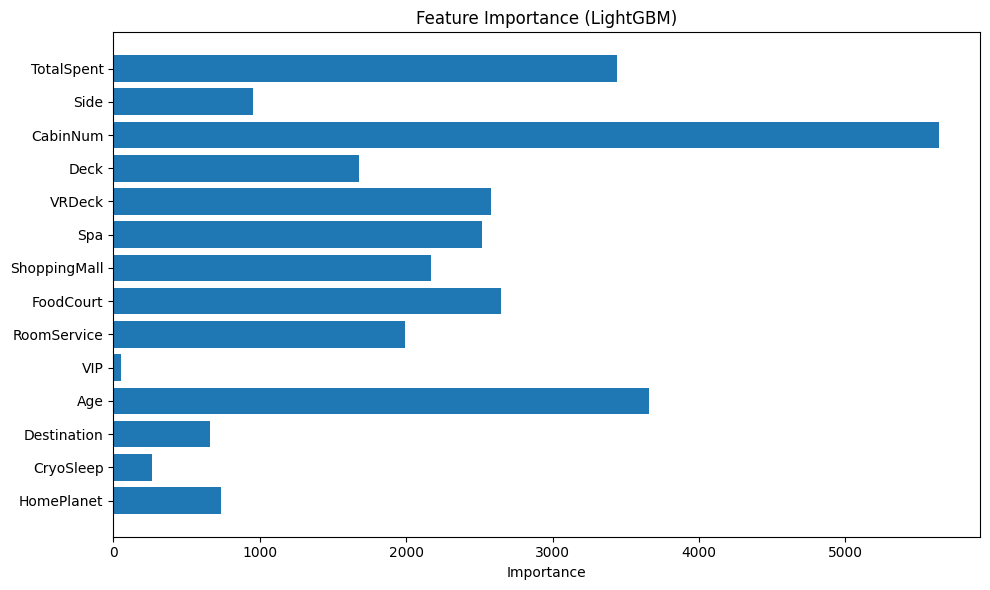

In [272]:
import matplotlib.pyplot as plt

# 모델 전체 데이터로 다시 학습
model = LGBMClassifier(
    random_state=42,
    n_estimators=500,
    learning_rate=0.03,
    max_depth=9,
    num_leaves=64
)
model.fit(X_train_final, y_train)

# 중요도 추출
importances = model.feature_importances_
features = X_train_final.columns

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (LightGBM)")
plt.tight_layout()
plt.show()

In [273]:
X_corr = X_train_final.copy()
X_corr['Transported_bool'] = y_train.astype(int)

numeric_corr = X_corr.corr()['Transported_bool'].drop('Transported_bool').sort_values(ascending=False)
print("✅ 수치형 Feature와 Transported의 상관계수:")
print(numeric_corr)


✅ 수치형 Feature와 Transported의 상관계수:
CryoSleep       0.460132
HomePlanet      0.107755
Side            0.093319
FoodCourt       0.045583
ShoppingMall    0.009391
VIP            -0.037261
CabinNum       -0.043832
Age            -0.074233
Destination    -0.104817
Deck           -0.109925
TotalSpent     -0.199514
VRDeck         -0.204874
Spa            -0.218545
RoomService    -0.241124
Name: Transported_bool, dtype: float64


In [274]:
# 예: CryoSleep이 True일 때 전이 비율

# 범주형 변수  선택
categorical_features = ['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Deck', 'Side']

for col in categorical_features:
    print(f"\n✅ 범주형 Feature 예시 - {col}:")
    print(X_corr.groupby(col)['Transported_bool'].mean())


✅ 범주형 Feature 예시 - CryoSleep:
CryoSleep
0    0.335042
1    0.817583
Name: Transported_bool, dtype: float64

✅ 범주형 Feature 예시 - VIP:
VIP
0    0.506475
1    0.381910
Name: Transported_bool, dtype: float64

✅ 범주형 Feature 예시 - HomePlanet:
HomePlanet
0    0.423946
1    0.658846
2    0.523024
3    0.512438
Name: Transported_bool, dtype: float64

✅ 범주형 Feature 예시 - Destination:
Destination
0    0.610000
1    0.503769
2    0.471175
3    0.505495
Name: Transported_bool, dtype: float64

✅ 범주형 Feature 예시 - Deck:
Deck
0    0.496094
1    0.734275
2    0.680054
3    0.433054
4    0.357306
5    0.439871
6    0.516217
7    0.200000
8    0.502513
Name: Transported_bool, dtype: float64

✅ 범주형 Feature 예시 - Side:
Side
0    0.451260
1    0.555037
2    0.502513
Name: Transported_bool, dtype: float64


In [275]:
X_train_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int32  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int32  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Deck          8693 non-null   int32  
 11  CabinNum      8693 non-null   float64
 12  Side          8693 non-null   int32  
 13  TotalSpent    8693 non-null   float64
dtypes: float64(8), int32(4), int64(2)
memory usage: 815.1 KB


In [276]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from lightgbm import early_stopping
from lightgbm import LGBMClassifier
import numpy as np

In [277]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# val_scores = []

In [278]:
# for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_final, y_train)):
#     X_tr, X_val = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
#     y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

#     model = LGBMClassifier(
#         random_state=42,
#         n_estimators=1000,
#         learning_rate=0.03,
#         max_depth=9,
#         num_leaves=64
#     )
#     model.fit(
#     X_tr, y_tr,
#     eval_set=[(X_val, y_val)],
#     eval_metric='accuracy',
#     callbacks=[early_stopping(50)],
#     # verbose=False
#     )

#     preds = model.predict(X_val)
#     score = accuracy_score(y_val, preds)
#     val_scores.append(score)
#     print(f"✅ Fold {fold+1} Score: {score:.5f}")

# print("📊 평균 검증 점수:", np.mean(val_scores))

In [279]:

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # 훈련 / 검증 분리
# X_tr, X_val, y_tr, y_val = train_test_split(X_train_final, y_train, test_size=0.2, random_state=42)

# # 모델 학습
# model = LGBMClassifier(random_state=42)
# model.fit(X_tr, y_tr)

# # 검증 정확도
# val_pred = model.predict(X_val)
# print("✅ Validation Accuracy:", accuracy_score(y_val, val_pred))


In [280]:
# final_model = LGBMClassifier(
#     random_state=42,
#     n_estimators=149,  # early stopping에서 가장 좋았던 시점 반영 (선택)
#     learning_rate=0.03,
#     max_depth=9,
#     num_leaves=64
# )
# final_model.fit(X_train_final, y_train)

In [281]:
# preds = final_model.predict(X_test_final)
# submission['Transported'] = preds.astype(bool)
# submission.to_csv("submissionLGB.csv", index=False)
# print("✅ 제출 파일 저장 완료!")

In [282]:
# from xgboost import XGBClassifier

# xgb_model = XGBClassifier(
#     n_estimators=300,
#     learning_rate=0.03,
#     max_depth=6,
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42
# )
# xgb_model.fit(X_train_final, y_train)

In [283]:
# lgb_pred = final_model.predict_proba(X_test_final)[:, 1]
# xgb_pred = xgb_model.predict_proba(X_test_final)[:, 1]

# # Soft Voting
# final_pred = (lgb_pred + xgb_pred) / 2
# submission['Transported'] = (final_pred > 0.5)

In [284]:
# from sklearn.model_selection import train_test_split

# X_tr, X_val, y_tr, y_val = train_test_split(X_train_final, y_train, test_size=0.2, random_state=42)

# final_model.fit(X_tr, y_tr)
# xgb_model.fit(X_tr, y_tr)

# lgb_pred = final_model.predict_proba(X_val)[:, 1]
# xgb_pred = xgb_model.predict_proba(X_val)[:, 1]

# soft_pred = (lgb_pred + xgb_pred) / 2
# final_pred = (soft_pred > 0.5)

# print("✅ Soft Voting Validation Accuracy:", accuracy_score(y_val, final_pred))